In [1]:
import sys
sys.path.insert(0, '../src')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv(os.path.join('../data', 'aggregated1.csv'))

years = data['year'].unique()
seps = [0]
for year in data['year'].unique()[1:]:
    seps.append(np.where(data['year'] == year)[0][0] - 0.5)
seps.append(len(data))

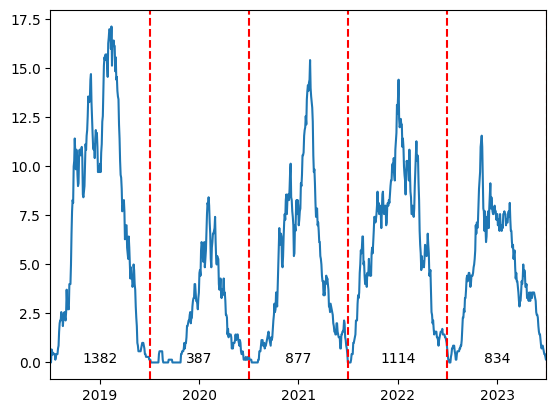

In [3]:
# TODO: rolling windows into different years
plt.plot(data['boat'].rolling(7, min_periods=1).mean())
text_pos = []
for i, year in enumerate(years):    
    plt.axvline(x=seps[i+1], color='red', linestyle='--')
    x = data.loc[data['year'] == year, 'boat'].sum()
    plt.text((seps[i]+seps[i+1])/2, 0, x, ha='center')
    text_pos.append((seps[i]+seps[i+1])/2)
plt.xticks(text_pos, years)
plt.xlim([0, len(data)-1])
plt.savefig('Boats.png')

In [4]:
data_m = pd.DataFrame(columns=['year', 'month', 'boat', 'underwater'])
for (y, m), df_red in data.groupby(['year', 'month']):
    data_add = pd.DataFrame([[y, m, df_red['boat'].sum(), df_red['underwater'].sum()]], columns=data_m.columns)
    data_m = pd.concat([data_m, data_add], ignore_index=True)
data_m.sort_values(['year', 'month'], inplace=True)

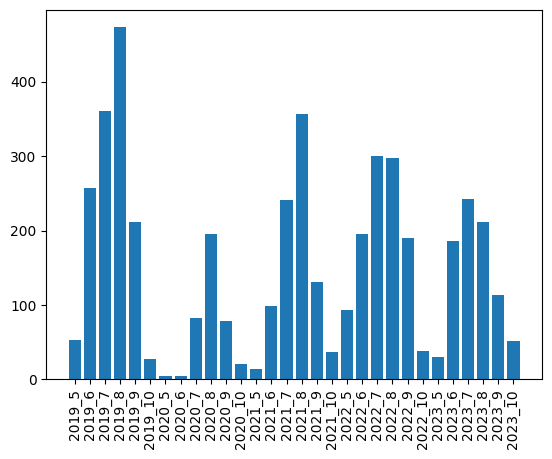

In [5]:
plt.bar([str(y) + '_' + str(m) for y, m in zip(data_m['year'], data_m['month'])],  data_m['boat'])
plt.xticks(rotation=90)
plt.savefig('Boats2.png', bbox_inches='tight')